In [17]:
import pandas as pd

Data = pd.read_csv('Data Sets/1-16_12-2.csv',delimiter = ',')

# DataExample = DataExample.iloc[:, [2,4,5,6,9,16]]

Data

,Time (sec),Feed Flowrate (ml/min),Feed Temperature (C),Reboiler Duty (w),Reflux Flowrate (ml/min),Reboiler Pressure (mbar),Reboiler Temperature (C),Tray 11 Temperature (C),Tray 4 Temperature (C),Overhead Vapor Temperature (C),Reflux Temperature (C),Approx Distillate Comp (Wt% CH3OH),Approx Bottoms Comp (Wt% CH3OH),Feed Heater Output (%),Bottoms Pump Output (%),Feed Tank Weight Kg,Ambient Temperature (C),Ambient Pressure (kPa)
0,18305.15331,9.999678,65.084263,869.999763,29.999812,866.818935,73.780556,68.886178,63.875671,63.327081,27.251375,90.050151,3.850244,15.496609,-0.001982,14.676873,21.986634,85.575043
1,18606.05546,9.999678,64.754138,869.999763,29.999812,865.685329,73.591430,68.773564,63.863296,63.252568,27.358546,89.900875,3.839113,16.106352,-0.001982,14.638163,22.012156,85.567065
2,18906.59146,9.999678,65.216082,869.999763,29.999812,869.774953,73.582516,68.627451,63.773016,63.007424,27.366763,89.900413,3.903187,15.713805,-0.001982,14.565460,22.007594,85.543875
3,19206.88146,9.999678,64.969374,869.999763,29.999812,865.610451,73.647903,68.681504,63.767167,63.158509,27.715043,90.087866,3.920139,15.614174,-0.001982,14.532393,22.026627,85.545753
4,19507.28446,9.999678,64.976606,869.999763,29.999812,865.771756,73.508433,68.786144,63.791268,63.067699,27.444197,90.103718,3.923295,15.725761,-0.001982,14.528393,22.130484,85.536195
5,19807.58073,9.999678,65.062129,869.999763,29.999812,864.164852,73.782003,68.589326,63.722463,63.048521,27.775055,90.480554,3.584801,15.879193,-0.001982,14.442971,22.246703,85.510382
6,20107.32331,9.999678,65.059962,869.999763,29.999812,863.151945,73.606036,68.551696,63.665340,62.875181,27.745925,90.671455,3.439588,15.526498,-0.001982,14.343760,22.232671,85.511108
7,20408.44146,9.999678,64.920330,869.999763,29.999812,863.727503,73.722524,68.439744,63.556902,62.781036,27.846306,90.896637,3.489763,15.739709,-0.001982,14.400642,22.140845,85.489610
8,20708.90723,9.999678,64.890849,869.999763,29.999812,866.316207,73.520357,68.327975,63.512670,62.753578,27.791917,91.086508,3.571365,16.401261,-0.001982,14.348915,22.058199,85.483864
9,21009.23346,9.999678,65.117750,869.999763,29.999812,863.085076,73.541619,68.370972,63.532867,62.800174,27.894434,91.270448,3.658287,15.646056,-0.001982,14.340445,22.093137,85.457689


# Finding Steady State

In [18]:
import numpy as np

botComp = 'Approx Distillate Comp (Wt% CH3OH)'
distComp = 'Approx Bottoms Comp (Wt% CH3OH)'
λ1 = 0.2
λ2 = λ1
λ3 = 0.1
Rbot = np.zeros(len(Data[botComp]))
Rdist = np.zeros(len(Data[distComp]))


Data[botComp]
Data[distComp]

# Xfbot = λ1*Data[botComp]

def GetR(Xi,Xi_1=0,Xf_1=0,ν2fi_1=0,δ2fi_1=0):
    
    
    
    Xf = λ1*Xi + (1-λ1)*Xf_1
    ν2fi = λ2*(Xi - Xf_1)**2 + (1-λ2)*ν2fi_1
    δ2fi = λ3*(Xi - Xi_1)**2 + (1-λ3)*δ2fi_1
    R = ((2-λ1)*ν2fi)/δ2fi
    return [R,Xf,ν2fi,δ2fi]


myVals = GetR(Data[botComp][0])
Rbot[0] = myVals[0]
for i in range(1,len(Data[botComp])):
    myVals = GetR(Data[botComp][i],Data[botComp][i-1],myVals[1],myVals[2],myVals[3])
    Rbot[i] = myVals[0]

myVals = GetR(Data[distComp][0])
Rdist[0] = myVals[0]
for i in range(1,len(Data[distComp])):
    myVals = GetR(Data[distComp][i],Data[distComp][i-1],myVals[1],myVals[2],myVals[3])
    Rdist[i] = myVals[0]    
    
# print(Rbot)
# print()
# print(Rdist)

Data['R Distillate'] = Rdist
Data['R Bottoms'] = Rbot
Data

,Time (sec),Feed Flowrate (ml/min),Feed Temperature (C),Reboiler Duty (w),Reflux Flowrate (ml/min),Reboiler Pressure (mbar),Reboiler Temperature (C),Tray 11 Temperature (C),Tray 4 Temperature (C),Overhead Vapor Temperature (C),Reflux Temperature (C),Approx Distillate Comp (Wt% CH3OH),Approx Bottoms Comp (Wt% CH3OH),Feed Heater Output (%),Bottoms Pump Output (%),Feed Tank Weight Kg,Ambient Temperature (C),Ambient Pressure (kPa),R Distillate,R Bottoms
0,18305.15331,9.999678,65.084263,869.999763,29.999812,866.818935,73.780556,68.886178,63.875671,63.327081,27.251375,90.050151,3.850244,15.496609,-0.001982,14.676873,21.986634,85.575043,3.600000,3.600000
1,18606.05546,9.999678,64.754138,869.999763,29.999812,865.685329,73.591430,68.773564,63.863296,63.252568,27.358546,89.900875,3.839113,16.106352,-0.001982,14.638163,22.012156,85.567065,5.741478,5.749384
2,18906.59146,9.999678,65.216082,869.999763,29.999812,869.774953,73.582516,68.627451,63.773016,63.007424,27.366763,89.900413,3.903187,15.713805,-0.001982,14.565460,22.007594,85.543875,7.003995,6.923437
3,19206.88146,9.999678,64.969374,869.999763,29.999812,865.610451,73.647903,68.681504,63.767167,63.158509,27.715043,90.087866,3.920139,15.614174,-0.001982,14.532393,22.026627,85.545753,7.601100,7.453802
4,19507.28446,9.999678,64.976606,869.999763,29.999812,865.771756,73.508433,68.786144,63.791268,63.067699,27.444197,90.103718,3.923295,15.725761,-0.001982,14.528393,22.130484,85.536195,7.738454,7.550606
5,19807.58073,9.999678,65.062129,869.999763,29.999812,864.164852,73.782003,68.589326,63.722463,63.048521,27.775055,90.480554,3.584801,15.879193,-0.001982,14.442971,22.246703,85.510382,7.167494,7.386079
6,20107.32331,9.999678,65.059962,869.999763,29.999812,863.151945,73.606036,68.551696,63.665340,62.875181,27.745925,90.671455,3.439588,15.526498,-0.001982,14.343760,22.232671,85.511108,6.530889,7.052753
7,20408.44146,9.999678,64.920330,869.999763,29.999812,863.727503,73.722524,68.439744,63.556902,62.781036,27.846306,90.896637,3.489763,15.739709,-0.001982,14.400642,22.140845,85.489610,5.955104,6.623751
8,20708.90723,9.999678,64.890849,869.999763,29.999812,866.316207,73.520357,68.327975,63.512670,62.753578,27.791917,91.086508,3.571365,16.401261,-0.001982,14.348915,22.058199,85.483864,5.439512,6.146122
9,21009.23346,9.999678,65.117750,869.999763,29.999812,863.085076,73.541619,68.370972,63.532867,62.800174,27.894434,91.270448,3.658287,15.646056,-0.001982,14.340445,22.093137,85.457689,4.985861,5.652289


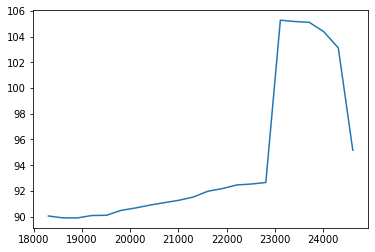

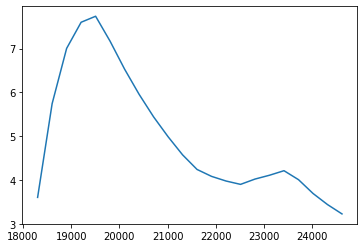

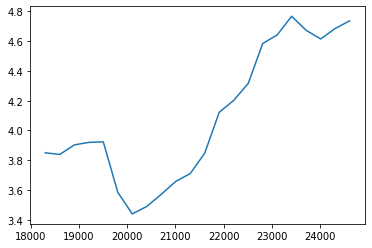

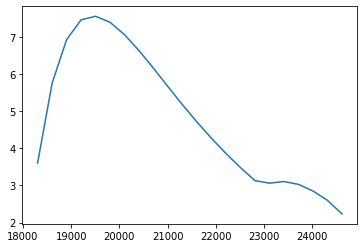

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(Data['Time (sec)'],Data['Approx Distillate Comp (Wt% CH3OH)'])

plt.figure(2)
plt.plot(Data['Time (sec)'],Data['R Distillate'])

plt.figure(3)
plt.plot(Data['Time (sec)'],Data['Approx Bottoms Comp (Wt% CH3OH)'])

plt.figure(4)
plt.plot(Data['Time (sec)'],Data['R Bottoms'])